# AIM

### The primary goal of this project is to design and implement an effective recommendation system for an online retail platform specializing in cell phones. Through the utilization of sentiment analysis and Word2Vec embeddings, we aim to provide personalized product recommendations to users based on their historical behavior and the content of their reviews. Our objectives include enhancing user satisfaction by delivering relevant product suggestions, increasing user engagement and retention, and ultimately driving higher conversion rates and revenue for the platform. Additionally, we intend to explore the impact of this recommendation system on mitigating data imbalances and improving the discoverability of less-reviewed cell phone models. By achieving these goals, we aim to establish a robust and data-driven approach to customer engagement and product promotion within the online retail space.


#### Group Members - Riya Virani (002747048), Tanmay Shekhar (002747412)

# Steps Followed:

1. EDA with Visualization to understand the data
2. Data Preprocessing - Data Undersampling
3. Feature Engineering
4. Model Building & Train the Models
5. Make Predictions
6. Evaluate Model Performance
7. Visualize Results on Confusion Matrices and ROC Curves
8. Build a Product Recommendation System
9. Deployment Prep
9. Streamlit Web Application Deployment

### Import Required Libraries

In [86]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import itertools
import re
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, GRU, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.legacy import Adam
from keras.layers import Embedding, Flatten, Dense
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [88]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Error loading omw-1.4: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


False

### Evaluating the Amazon Cell Phone Reviews Dataset by performing EDA Techniques

Merging the two datasets ino one based on the primary key/unique column 'asin'

In [89]:
# Load the first CSV file
items = pd.read_csv('20191226-items.csv')

# Load the second CSV file
reviews = pd.read_csv('20191226-reviews.csv')


In [90]:
items.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [91]:
reviews.head()


,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [92]:
combined_data = pd.merge(items, reviews, on='asin', how='inner')

combined_data.head()


,asin,brand,title_x,url,image,rating_x,reviewUrl,totalReviews,price,originalPrice,name,rating_y,date,verified,title_y,body,helpfulVotes
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [93]:
combined_data.to_csv('combined_data.csv', index=False)

### Reading the Combined csv into a df again 

In [94]:
df = pd.read_csv('combined_data.csv')

# Display the first few rows of the dataframe
df.head()

,asin,brand,title_x,url,image,rating_x,reviewUrl,totalReviews,price,originalPrice,name,rating_y,date,verified,title_y,body,helpfulVotes
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [95]:
df.describe()

,rating_x,totalReviews,price,originalPrice,rating_y,helpfulVotes
count,67986.000000,67986.000000,67986.000000,67986.000000,67986.000000,27215.000000
mean,3.766826,373.742800,222.050506,84.057634,3.807916,8.229690
std,0.429197,262.560876,188.863986,201.923373,1.582906,31.954877
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,3.500000,153.000000,103.980000,0.000000,3.000000,1.000000
50%,3.800000,336.000000,179.990000,0.000000,5.000000,2.000000
75%,4.100000,558.000000,300.550000,0.000000,5.000000,5.000000
max,5.000000,983.000000,999.990000,999.990000,5.000000,990.000000


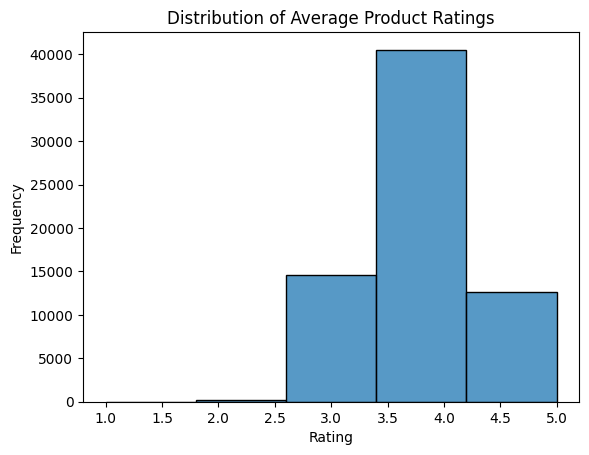

In [96]:
# Data Distribution

sns.histplot(df['rating_x'], kde=False, bins=5)
plt.title('Distribution of Average Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

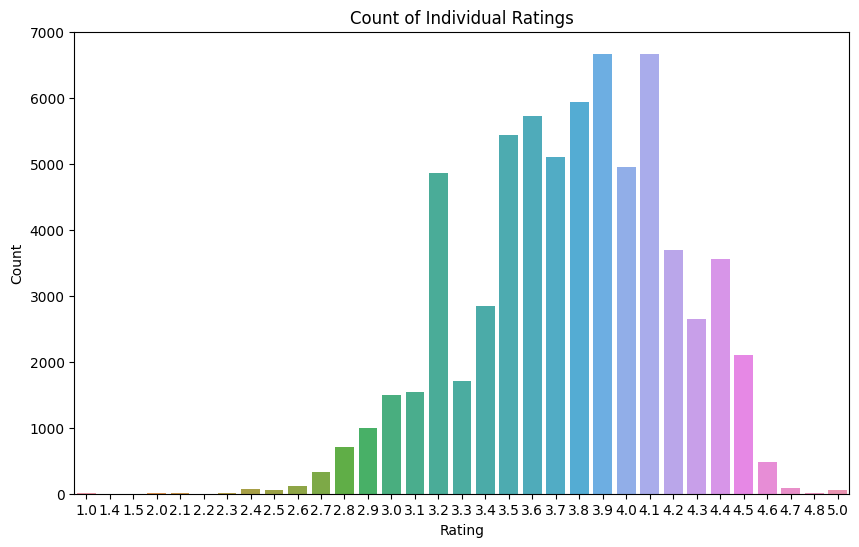

In [97]:
# Ratings Analysis

plt.figure(figsize=(10, 6))
sns.countplot(x='rating_x', data=df)
plt.title('Count of Individual Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

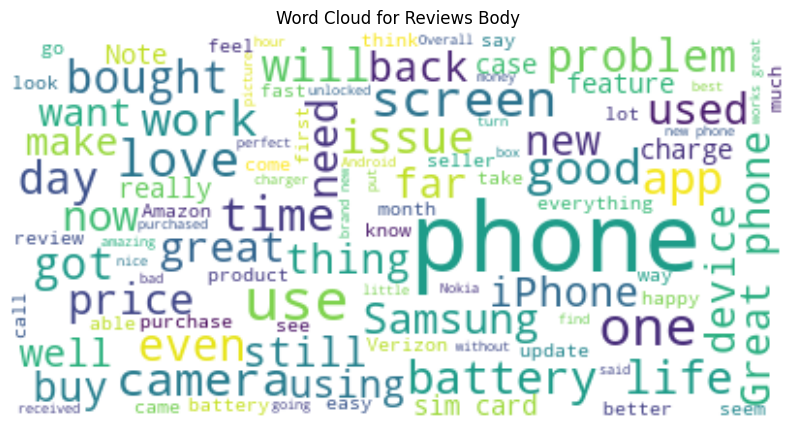

In [98]:
# Text Analysis - Word Cloud for 'body'

text = ' '.join(review for review in df['body'].dropna())
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for Reviews Body')
plt.show()


/var/folders/bv/0yfcmj4j64j857gpdn2yfnbr0000gn/T/ipykernel_53661/3579639672.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


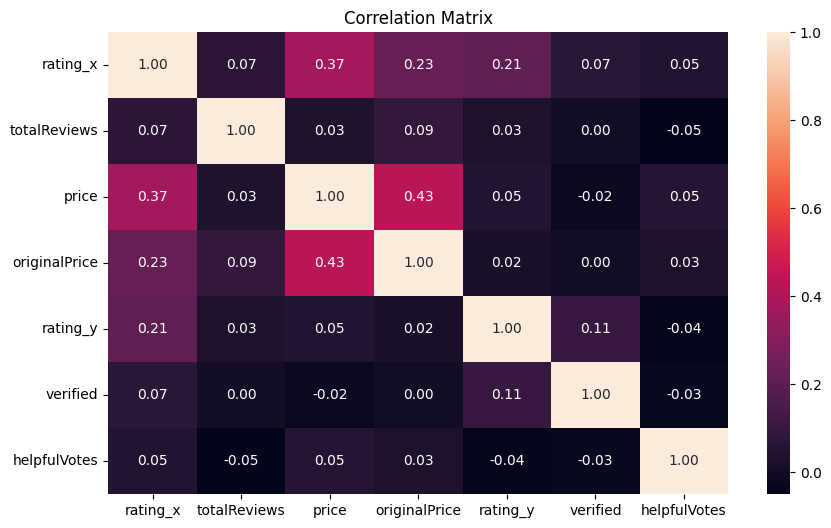

In [99]:
# Correlation Analysis

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

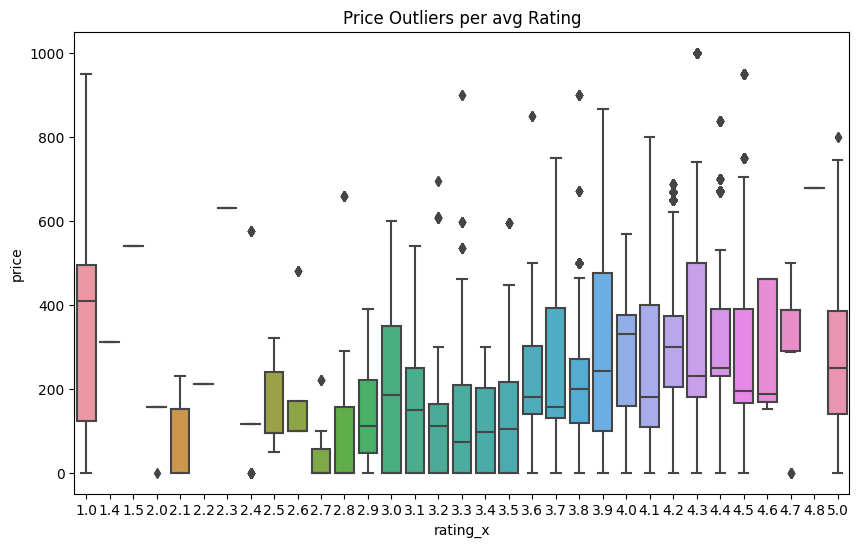

In [100]:
# Anomalies/Outliers Detection

plt.figure(figsize=(10, 6))
sns.boxplot(x='rating_x', y='price', data=df)
plt.title('Price Outliers per avg Rating')
plt.show()

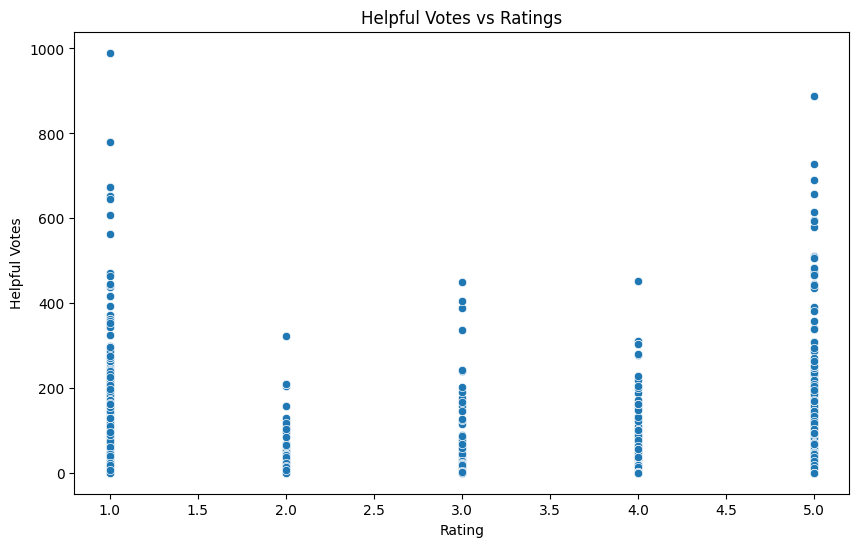

In [101]:
# Scatter plot for helpful votes vs. ratings

plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating_y', y='helpfulVotes', data=df)
plt.title('Helpful Votes vs Ratings')
plt.xlabel('Rating')
plt.ylabel('Helpful Votes')
plt.show()

### Observation



### Data Preprocessing

In [102]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display the results
missing_data_info = pd.DataFrame({'Column Name': df.columns, 'Missing Percentage': missing_percentage})

# Sort the DataFrame by the missing percentage in descending order
missing_data_info = missing_data_info.sort_values(by='Missing Percentage', ascending=False)

# Print the result
print("Percentage of Missing Data:")
print(missing_data_info)

Percentage of Missing Data:
                 Column Name  Missing Percentage
helpfulVotes    helpfulVotes           59.969700
brand                  brand            0.294178
body                    body            0.030889
title_y              title_y            0.020592
name                    name            0.002942
originalPrice  originalPrice            0.000000
verified            verified            0.000000
date                    date            0.000000
rating_y            rating_y            0.000000
asin                    asin            0.000000
totalReviews    totalReviews            0.000000
reviewUrl          reviewUrl            0.000000
rating_x            rating_x            0.000000
image                  image            0.000000
url                      url            0.000000
title_x              title_x            0.000000
price                  price            0.000000


In [103]:
# Calculate the percentage of "0" values for each numeric column
zero_percentage = (df[df.select_dtypes(include='number') == 0].count() / len(df)) * 100

# Create a DataFrame to display the results
zero_data_info = pd.DataFrame({'Column Name': zero_percentage.index, 'Zero Percentage': zero_percentage.values})

# Sort the DataFrame by the zero percentage in descending order
zero_data_info = zero_data_info.sort_values(by='Zero Percentage', ascending=False)

# Print the result
print("Percentage of '0' Values:")
print(zero_data_info)

Percentage of '0' Values:
      Column Name  Zero Percentage
9   originalPrice        78.992734
8           price        17.290324
15           body         0.000000
14        title_y         0.000000
13       verified         0.000000
12           date         0.000000
11       rating_y         0.000000
10           name         0.000000
0            asin         0.000000
1           brand         0.000000
7    totalReviews         0.000000
6       reviewUrl         0.000000
5        rating_x         0.000000
4           image         0.000000
3             url         0.000000
2         title_x         0.000000
16   helpfulVotes         0.000000


#### Drop columns that are not needed

In [104]:
df = df.drop(['reviewUrl', 'originalPrice', 'verified'], axis=1)

#### Impute missing values or drop rows/columns with missing values

In [105]:
# Fill missing 'brand' values with 'Unknown'
df['brand'] = df['brand'].fillna('Unknown')


# Drop rows where 'price' column is 0
df = df[df['price'] != 0]

# Fill missing 'helpfulVotes' with 0
df['helpfulVotes'] = df['helpfulVotes'].fillna(0)

#### Make column names more relatable

In [106]:
column_mapping = {
    'rating_x': 'avg_rating_per_item',
    'rating_y': 'rating',
    'title_y' : 'review_title',
    'title_x': 'product_name',
    'body' : 'review_body'
}

df.rename(columns=column_mapping, inplace=True)
df.columns

Index(['asin', 'brand', 'product_name', 'url', 'image', 'avg_rating_per_item',
       'totalReviews', 'price', 'name', 'rating', 'date', 'review_title',
       'review_body', 'helpfulVotes'],
      dtype='object')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56231 entries, 14 to 67985
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   asin                 56231 non-null  object 
 1   brand                56231 non-null  object 
 2   product_name         56231 non-null  object 
 3   url                  56231 non-null  object 
 4   image                56231 non-null  object 
 5   avg_rating_per_item  56231 non-null  float64
 6   totalReviews         56231 non-null  int64  
 7   price                56231 non-null  float64
 8   name                 56229 non-null  object 
 9   rating               56231 non-null  int64  
 10  date                 56231 non-null  object 
 11  review_title         56219 non-null  object 
 12  review_body          56213 non-null  object 
 13  helpfulVotes         56231 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 6.4+ MB


#### Drop rows where any of these important columns have missing values

In [108]:
df.dropna(subset=['review_title', 'review_body', 'rating'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56205 entries, 14 to 67985
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   asin                 56205 non-null  object 
 1   brand                56205 non-null  object 
 2   product_name         56205 non-null  object 
 3   url                  56205 non-null  object 
 4   image                56205 non-null  object 
 5   avg_rating_per_item  56205 non-null  float64
 6   totalReviews         56205 non-null  int64  
 7   price                56205 non-null  float64
 8   name                 56203 non-null  object 
 9   rating               56205 non-null  int64  
 10  date                 56205 non-null  object 
 11  review_title         56205 non-null  object 
 12  review_body          56205 non-null  object 
 13  helpfulVotes         56205 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 6.4+ MB


#### Drop rows where any of these values have duplicate subsets

In [109]:
df.drop_duplicates(subset=['asin', 'review_title', 'review_body'], inplace=True)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55922 entries, 14 to 67985
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   asin                 55922 non-null  object 
 1   brand                55922 non-null  object 
 2   product_name         55922 non-null  object 
 3   url                  55922 non-null  object 
 4   image                55922 non-null  object 
 5   avg_rating_per_item  55922 non-null  float64
 6   totalReviews         55922 non-null  int64  
 7   price                55922 non-null  float64
 8   name                 55920 non-null  object 
 9   rating               55922 non-null  int64  
 10  date                 55922 non-null  object 
 11  review_title         55922 non-null  object 
 12  review_body          55922 non-null  object 
 13  helpfulVotes         55922 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 6.4+ MB


#### Now df is ready for further preprocessing such as NLP-specific text cleaning

In [111]:
# Combine review_title and review_body

df['review'] = df['review_title'] + ' ' + df['review_body']
df = df.drop(['review_title', 'review_body'], axis=1)
df.columns

Index(['asin', 'brand', 'product_name', 'url', 'image', 'avg_rating_per_item',
       'totalReviews', 'price', 'name', 'rating', 'date', 'helpfulVotes',
       'review'],
      dtype='object')

### Text Cleaning

In [112]:
def clean_text(text):
    text = text.lower()  # convert to lowercase
    text = re.sub('\[.*?\]', '', text)  # remove text within brackets
    text = re.sub(f'[{string.punctuation}]', '', text)  # remove punctuation
    text = re.sub('\w*\d\w*', '', text)  # remove words containing numbers
    text = re.sub('\n', '', text)  # remove line breaks
    text = re.sub('http\S+', '', text)  # remove URLs
    return text

# Apply the clean_text function to the review body
df['review'] = df['review'].apply(clean_text)
df.head()

,asin,brand,product_name,url,image,avg_rating_per_item,totalReviews,price,name,rating,date,helpfulVotes,review
14,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,Marcel Thomas,1,"March 5, 2016",0.0,stupid phone dont buy out of service
15,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,William B.,4,"February 9, 2006",0.0,exellent service i have been with nextel for n...
16,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,K. Mcilhargey,5,"February 7, 2006",0.0,i love it i just got it and have to say its ea...
17,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,Stephen Cahill,1,"December 20, 2016",0.0,phones locked star because the phones locked ...
18,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,Mihir,5,"December 13, 2009",0.0,excellent product the product has been very go...


### Remove Stopwords using NLTK

In [113]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_text = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_text)

df['review'] = df['review'].apply(remove_stopwords)
df.head()

,asin,brand,product_name,url,image,avg_rating_per_item,totalReviews,price,name,rating,date,helpfulVotes,review
14,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,Marcel Thomas,1,"March 5, 2016",0.0,stupid phone dont buy service
15,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,William B.,4,"February 9, 2006",0.0,exellent service nextel nearly year started ti...
16,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,K. Mcilhargey,5,"February 7, 2006",0.0,love got say easy use hear person talking fine...
17,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,Stephen Cahill,1,"December 20, 2016",0.0,phones locked star phones locked pay additiona...
18,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,Mihir,5,"December 13, 2009",0.0,excellent product product good used cell phone...


### Lemmatization

In [114]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_text = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_text)

df['review'] = df['review'].apply(lemmatize_text)
df.head()

,asin,brand,product_name,url,image,avg_rating_per_item,totalReviews,price,name,rating,date,helpfulVotes,review
14,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,Marcel Thomas,1,"March 5, 2016",0.0,stupid phone dont buy service
15,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,William B.,4,"February 9, 2006",0.0,exellent service nextel nearly year started ti...
16,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,K. Mcilhargey,5,"February 7, 2006",0.0,love got say easy use hear person talking fine...
17,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,Stephen Cahill,1,"December 20, 2016",0.0,phone locked star phone locked pay additional ...
18,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,Mihir,5,"December 13, 2009",0.0,excellent product product good used cell phone...


### Feature Engineering

In [115]:
df['review_length'] = df['review'].apply(len)
df.head()

,asin,brand,product_name,url,image,avg_rating_per_item,totalReviews,price,name,rating,date,helpfulVotes,review,review_length
14,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,Marcel Thomas,1,"March 5, 2016",0.0,stupid phone dont buy service,29
15,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,William B.,4,"February 9, 2006",0.0,exellent service nextel nearly year started ti...,198
16,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,K. Mcilhargey,5,"February 7, 2006",0.0,love got say easy use hear person talking fine...,69
17,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,Stephen Cahill,1,"December 20, 2016",0.0,phone locked star phone locked pay additional ...,56
18,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,Mihir,5,"December 13, 2009",0.0,excellent product product good used cell phone...,118


In [116]:
rating_counts = df['rating'].value_counts().sort_index()
print("Rating Counts:")
print(rating_counts)

Rating Counts:
1    10397
2     3175
3     3895
4     7198
5    31257
Name: rating, dtype: int64


### Dropping the neutral rating (i.e., rating = 3)

In [117]:
df = df[df['rating'] != 3]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52027 entries, 14 to 67985
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   asin                 52027 non-null  object 
 1   brand                52027 non-null  object 
 2   product_name         52027 non-null  object 
 3   url                  52027 non-null  object 
 4   image                52027 non-null  object 
 5   avg_rating_per_item  52027 non-null  float64
 6   totalReviews         52027 non-null  int64  
 7   price                52027 non-null  float64
 8   name                 52026 non-null  object 
 9   rating               52027 non-null  int64  
 10  date                 52027 non-null  object 
 11  helpfulVotes         52027 non-null  float64
 12  review               52027 non-null  object 
 13  review_length        52027 non-null  int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 6.0+ MB


### Sampling the data
#### From the observations we found out that the data is highly unbalanced, hence we are going to perform undersampling on the rating = '5' values to match the count of positive and negative sentiments

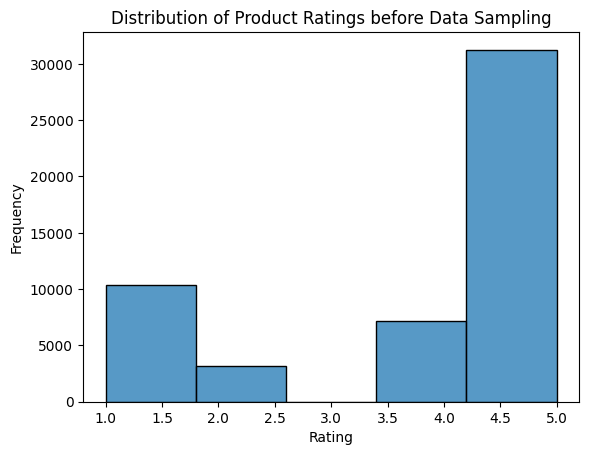

In [118]:
# Data Distribution

sns.histplot(df['rating'], kde=False, bins=5)
plt.title('Distribution of Product Ratings before Data Sampling')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [119]:
# Separate data by ratings
rating_1 = df[df['rating'] == 1]
rating_2 = df[df['rating'] == 2]
rating_4 = df[df['rating'] == 4]
rating_5 = df[df['rating'] == 5]

# Undersample the majority class (Rating 5) to approximately 10,000 records
desired_sample_count = 10000

if len(rating_5) > desired_sample_count:
    rating_5_undersampled = resample(rating_5, n_samples=desired_sample_count, random_state=42)
else:
    rating_5_undersampled = rating_5

# Combine the undersampled majority class with minority classes
balanced_df = pd.concat([rating_1, rating_2, rating_4, rating_5_undersampled])

rating_counts = balanced_df['rating'].value_counts().sort_index()
print("Rating Counts in Ascending Order:")
print(rating_counts)

Rating Counts in Ascending Order:
1    10397
2     3175
4     7198
5    10000
Name: rating, dtype: int64


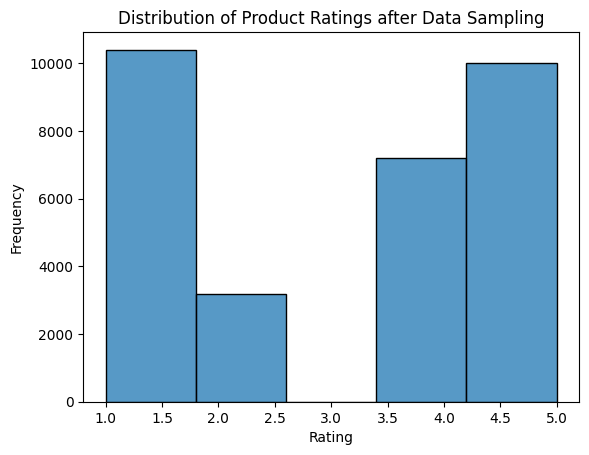

In [120]:
# Data Distribution

sns.histplot(balanced_df['rating'], kde=False, bins=5)
plt.title('Distribution of Product Ratings after Data Sampling')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [121]:
balanced_df.to_csv('recommendation_df.csv')
recommendation_df = balanced_df
recommendation_df.head()

,asin,brand,product_name,url,image,avg_rating_per_item,totalReviews,price,name,rating,date,helpfulVotes,review,review_length
14,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,Marcel Thomas,1,"March 5, 2016",0.0,stupid phone dont buy service,29
17,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,Stephen Cahill,1,"December 20, 2016",0.0,phone locked star phone locked pay additional ...,56
19,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,7,49.95,L. Hughes,1,"July 21, 2005",0.0,warning problem nextel stop canceled service g...,1629
22,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,22,99.99,"Kei, San Jose, CA",1,"May 13, 2017",0.0,seems doesnt work existing att sim card purcha...,221
23,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,22,99.99,Kristy,1,"March 13, 2019",0.0,supply needed phone come charger didnt sims card,48


### Proceeding to Modeling and Predictions for Sentiment Analysis
### 

In [122]:
# Convert rating to a binary classification (0 for negative, 1 for positive)
balanced_df['target'] = balanced_df['rating'].apply(lambda x: 0 if x < 3 else 1)


In [123]:
# Define features and target variable
X = balanced_df['review']  # Text feature
y = balanced_df['target']  # Target variable


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### 1. Naive Bayes

In [124]:
# Initialize the CountVectorizer
count_vect = CountVectorizer()

# Fit and transform the training data to a document-term matrix
X_train_counts = count_vect.fit_transform(X_train)

# Initialize the TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Fit and transform the count vectorized training data to TF-IDF
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Train the Naive Bayes classifier
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [125]:
# Transform the test data

X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Predict the sentiment on the test data
y_pred = clf.predict(X_test_tfidf)

In [126]:
# Classification report for training data
y_train_pred = clf.predict(X_train_tfidf)
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

# Classification report for testing data
print("Classification Report for Testing Data:")
print(classification_report(y_test, y_pred))


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     10856
           1       0.91      0.94      0.93     13760

    accuracy                           0.92     24616
   macro avg       0.92      0.91      0.91     24616
weighted avg       0.92      0.92      0.92     24616

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.90      0.83      0.87      2716
           1       0.87      0.93      0.90      3438

    accuracy                           0.89      6154
   macro avg       0.89      0.88      0.88      6154
weighted avg       0.89      0.89      0.89      6154



In [127]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[2253  463]
 [ 240 3198]]


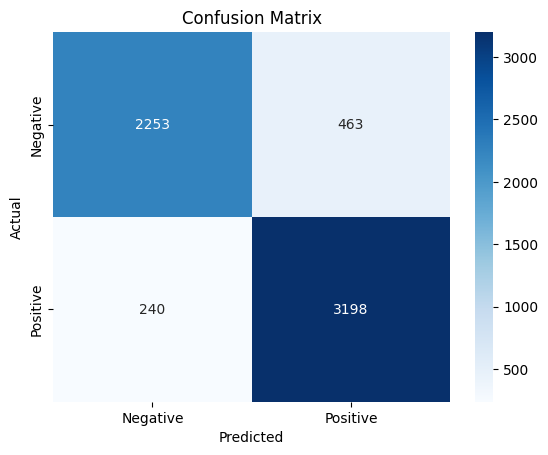

In [128]:
# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.show()

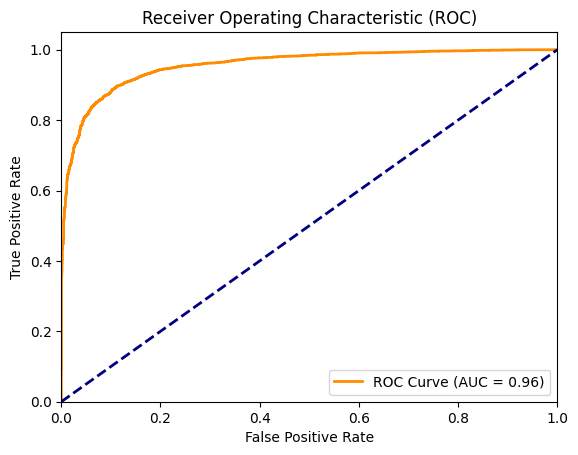

In [129]:
# ROC curve and AUC for testing data
y_pred_prob = clf.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### 2. LSTM

In [130]:
# Tokenize the text data

MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 213  # we set this to the length that we want our sequences to be

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)  

# Convert the train and test texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform length
X_train_data = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
X_test_data = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH)


In [131]:
# Building the model
model = Sequential()
model.add(Embedding(MAX_NUM_WORDS, 128, input_length=MAX_SEQUENCE_LENGTH))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))  

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [132]:
# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train_data, y_train, batch_size=32, epochs=10,
                    validation_data=(X_test_data, y_test), callbacks=[early_stopping])

Epoch 1/10
770/770 [==============================] - 5s 6ms/step - loss: 0.3257 - accuracy: 0.8564 - val_loss: 0.2538 - val_accuracy: 0.9017
Epoch 2/10
770/770 [==============================] - 4s 6ms/step - loss: 0.1669 - accuracy: 0.9393 - val_loss: 0.2583 - val_accuracy: 0.8989
Epoch 3/10
770/770 [==============================] - 4s 5ms/step - loss: 0.0988 - accuracy: 0.9671 - val_loss: 0.2817 - val_accuracy: 0.9006
Epoch 4/10
770/770 [==============================] - 5s 6ms/step - loss: 0.0554 - accuracy: 0.9846 - val_loss: 0.3177 - val_accuracy: 0.8994


In [133]:
test_loss, test_accuracy = model.evaluate(X_test_data, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

193/193 [==============================] - 0s 920us/step - loss: 0.3177 - accuracy: 0.8994
Test Accuracy: 89.94%


In [134]:
# Predictions
y_pred_test = model.predict(X_test_data)
y_pred_train = model.predict(X_train_data)

# Convert predictions to binary (0 or 1)
y_pred_test_binary = (y_pred_test > 0.5).astype("int32")
y_pred_train_binary = (y_pred_train > 0.5).astype("int32")

# Classification Report
print("Classification Report for Training Data:")
print(classification_report(y_train, y_pred_train_binary))

print("\nClassification Report for Testing Data:")
print(classification_report(y_test, y_pred_test_binary))

770/770 [==============================] - 1s 935us/step
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10856
           1       0.99      1.00      0.99     13760

    accuracy                           0.99     24616
   macro avg       0.99      0.99      0.99     24616
weighted avg       0.99      0.99      0.99     24616


Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2716
           1       0.91      0.91      0.91      3438

    accuracy                           0.90      6154
   macro avg       0.90      0.90      0.90      6154
weighted avg       0.90      0.90      0.90      6154



In [135]:
cm_lstm = confusion_matrix(y_test, y_pred_test_binary)
print("Confusion Matrix:")
print(cm_lstm)



Confusion Matrix:
[[2412  304]
 [ 315 3123]]


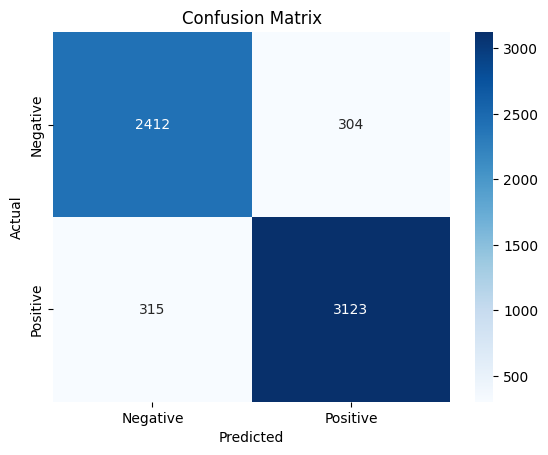

In [136]:
# Plotting the confusion matrix
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.show()

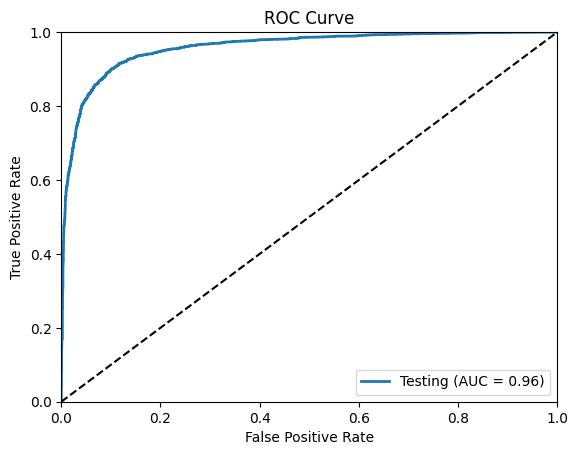

In [137]:
# ROC Curve function
def plot_roc_curve(y_true, y_score, label=None):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, linewidth=2, label=label + f' (AUC = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

# Plot ROC Curve for testing data
plot_roc_curve(y_test, y_pred_test.ravel(), 'Testing')
plt.legend(loc="lower right")
plt.show()

#### PRODUCT RECOMMENDATION

In [138]:
# Grouping by 'asin' and counting the number of occurrences for each 'asin'
new_total_reviews = recommendation_df.groupby('asin').size()

# Merging this count back into the original dataframe to update 'totalReviews' column
recommendation_df_updated = recommendation_df.merge(new_total_reviews.rename('new_totalReviews'), on='asin')

# Updating the 'totalReviews' column with the new counts
recommendation_df_updated['totalReviews'] = recommendation_df_updated['new_totalReviews']

# Dropping the temporary 'new_totalReviews' column
recommendation_df_updated.drop(columns=['new_totalReviews'], inplace=True)

# Displaying the updated dataframe
recommendation_df_updated.head()


,asin,brand,product_name,url,image,avg_rating_per_item,totalReviews,price,name,rating,date,helpfulVotes,review,review_length,target
0,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,5,49.95,Marcel Thomas,1,"March 5, 2016",0.0,stupid phone dont buy service,29,0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,5,49.95,Stephen Cahill,1,"December 20, 2016",0.0,phone locked star phone locked pay additional ...,56,0
2,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,5,49.95,L. Hughes,1,"July 21, 2005",0.0,warning problem nextel stop canceled service g...,1629,0
3,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,5,49.95,William B.,4,"February 9, 2006",0.0,exellent service nextel nearly year started ti...,198,1
4,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,5,49.95,Mihir,5,"December 13, 2009",0.0,excellent product product good used cell phone...,118,1


In [139]:
# Dropping the specified columns
columns_to_drop = ['helpfulVotes', 'review_length']
recommendation_df_cleaned = recommendation_df_updated.drop(columns=columns_to_drop)

# Displaying the updated dataframe
recommendation_df_cleaned.head()


,asin,brand,product_name,url,image,avg_rating_per_item,totalReviews,price,name,rating,date,review,target
0,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,5,49.95,Marcel Thomas,1,"March 5, 2016",stupid phone dont buy service,0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,5,49.95,Stephen Cahill,1,"December 20, 2016",phone locked star phone locked pay additional ...,0
2,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,5,49.95,L. Hughes,1,"July 21, 2005",warning problem nextel stop canceled service g...,0
3,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,5,49.95,William B.,4,"February 9, 2006",exellent service nextel nearly year started ti...,1
4,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,5,49.95,Mihir,5,"December 13, 2009",excellent product product good used cell phone...,1


In [140]:
recommendation_df_cleaned.to_csv('recommendation_df_cleaned.csv')

In [141]:
# Dropping the specified columns
columns_to_drop = ['rating', 'review', 'date']
recommendation_df_dropped = recommendation_df_cleaned.drop(columns=columns_to_drop)

# Displaying the updated dataframe
recommendation_df_dropped.head()


,asin,brand,product_name,url,image,avg_rating_per_item,totalReviews,price,name,target
0,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,5,49.95,Marcel Thomas,0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,5,49.95,Stephen Cahill,0
2,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,5,49.95,L. Hughes,0
3,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,5,49.95,William B.,1
4,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,5,49.95,Mihir,1


In [142]:
# Grouping by 'asin' and applying the nunique function to find out the number of unique values in each column
unique_values_per_asin = recommendation_df_cleaned.groupby('asin').nunique()

# Displaying the result
unique_values_per_asin.head()


,brand,product_name,url,image,avg_rating_per_item,totalReviews,price,name,rating,date,review,target
asin,,,,,,,,,,,,
B0009N5L7K,1,1,1,1,1,1,1,5,3,5,5,2
B000SKTZ0S,1,1,1,1,1,1,1,12,3,12,12,2
B001DCJAJG,1,1,1,1,1,1,1,6,4,6,6,2
B002WTC1NG,1,1,1,1,1,1,1,168,4,165,174,2
B0033SFV5A,1,1,1,1,1,1,1,34,4,35,35,2


In [143]:

# Define a custom aggregation function for reviews
def join_reviews(series):
    return ' | '.join(series.astype(str))

# Group by 'asin' and aggregate
grouped_df = recommendation_df_cleaned.groupby('asin').agg({
    'brand':'first',
    'product_name':'first',
    'url':'first',
    'image':'first',
    'avg_rating_per_item':'first',
    'totalReviews':'first',
    'price':'first'
})

# Reset index if you want 'asin' back as a column
grouped_df = grouped_df.reset_index()
grouped_df.head()


,asin,brand,product_name,url,image,avg_rating_per_item,totalReviews,price
0,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,5,49.95
1,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,13,99.99
2,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,6,149.99
3,B002WTC1NG,Motorola,Motorola Barrage V860 Phone (Verizon Wireless),https://www.amazon.com/Motorola-Barrage-V860-V...,https://m.media-amazon.com/images/I/81k6Nq0KI1...,3.6,187,139.99
4,B0033SFV5A,Samsung,Verizon or PagePlus Samsung Smooth U350 Great ...,https://www.amazon.com/Verizon-PagePlus-Samsun...,https://m.media-amazon.com/images/I/61nD-TYqHm...,3.3,37,64.99


In [144]:
grouped_df.shape

(559, 8)

In [145]:
grouped_df.to_csv('grouped_df.csv')

In [146]:

# Feature Engineering
# 1. Applying TF-IDF to 'product_name'
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
# Re-engineering features: Applying TF-IDF to 'product_name' and normalizing 'avg_rating_per_item' and 'price'
tfidf_matrix_product_name = tfidf_vectorizer.fit_transform(grouped_df['product_name'])

# 2. Normalizing 'avg_rating_per_item' and 'price'
scaler = MinMaxScaler()
avg_rating_scaled = scaler.fit_transform(grouped_df[['avg_rating_per_item']])
price_scaled = scaler.fit_transform(grouped_df[['price']])

# Combining all features into one matrix
features= np.hstack([tfidf_matrix_product_name.toarray(), avg_rating_scaled, price_scaled])

# Recompute the cosine similarity matrix
cosine_sim = cosine_similarity(features)




In [147]:
cosine_sim

array([[1.        , 0.30297422, 0.35743898, ..., 0.0218322 , 0.30069639,
        0.25809749],
       [0.30297422, 1.        , 0.27696528, ..., 0.05447502, 0.26755651,
        0.25503078],
       [0.35743898, 0.27696528, 1.        , ..., 0.08288916, 0.3193765 ,
        0.31735944],
       ...,
       [0.0218322 , 0.05447502, 0.08288916, ..., 1.        , 0.13583625,
        0.40380671],
       [0.30069639, 0.26755651, 0.3193765 , ..., 0.13583625, 1.        ,
        0.419778  ],
       [0.25809749, 0.25503078, 0.31735944, ..., 0.40380671, 0.419778  ,
        1.        ]])

In [148]:
cosine_sim[0]

array([1.        , 0.30297422, 0.35743898, 0.38059496, 0.2624457 ,
       0.22554707, 0.2456508 , 0.30015658, 0.23168808, 0.30326712,
       0.25634745, 0.23830611, 0.30775215, 0.20714008, 0.2316584 ,
       0.21731875, 0.07033021, 0.27211372, 0.35226296, 0.23204221,
       0.20239928, 0.19169643, 0.28507474, 0.20239726, 0.18605705,
       0.25825558, 0.26420304, 0.23844155, 0.29718663, 0.25207262,
       0.25173174, 0.17589838, 0.29594197, 0.23086678, 0.26947868,
       0.303086  , 0.32189596, 0.25787099, 0.23900919, 0.25116907,
       0.34131417, 0.28401057, 0.2054175 , 0.3492261 , 0.21722821,
       0.21754976, 0.18598493, 0.30279708, 0.24560338, 0.30827647,
       0.22487337, 0.2247852 , 0.16885006, 0.17768283, 0.29224557,
       0.19434437, 0.17629389, 0.40922001, 0.23918888, 0.20223995,
       0.24137082, 0.27563532, 0.21744415, 0.18558595, 0.32565575,
       0.22634154, 0.24420522, 0.30823995, 0.34638223, 0.16011319,
       0.21686561, 0.25828613, 0.20986016, 0.23879757, 0.23900

In [149]:
index = grouped_df[grouped_df['product_name'] == 'Motorola I265 phone'].index[0]
index

0

In [150]:
data = grouped_df

In [151]:
from gensim.models import Word2Vec
import string
 
# Preprocess the Product Names: Tokenization and removing punctuation
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    return text.split()  # Tokenize into words
 
data['product_name_tokens'] = data['product_name'].apply(preprocess_text)

In [152]:
# Training the Word2Vec model
word2vec_model = Word2Vec(sentences=data['product_name_tokens'], vector_size=100, window=5, min_count=1, workers=4)


In [153]:
# Function to create averaged word vectors for product names
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    nwords = 0
 
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1
            feature_vector = np.add(feature_vector, model.wv[word])
 
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

In [154]:
# Generating averaged word vector features from Word2Vec model
vocabulary = set(word2vec_model.wv.index_to_key)
features = [average_word_vectors(tokenized_sentence, word2vec_model, vocabulary, 100) for tokenized_sentence in data['product_name_tokens']]
 
# Normalize price and combine with word vector features
price_scaled = scaler.transform(data[['price']])  # Reusing the previously defined MinMaxScaler
combined_wordvec_features = np.hstack((features, price_scaled))
 
# Calculate cosine similarity for the new features
wordvec_cosine_sim = cosine_similarity(combined_wordvec_features, combined_wordvec_features)
 
wordvec_cosine_sim

array([[1.        , 0.99690875, 0.99277501, ..., 0.77468467, 0.99754029,
        0.68511995],
       [0.99690875, 1.        , 0.99854827, ..., 0.81755403, 0.99953768,
        0.73484758],
       [0.99277501, 0.99854827, 1.        , ..., 0.84296057, 0.9981042 ,
        0.7650509 ],
       ...,
       [0.77468467, 0.81755403, 0.84296057, ..., 1.        , 0.81179818,
        0.99112657],
       [0.99754029, 0.99953768, 0.9981042 , ..., 0.81179818, 1.        ,
        0.72803548],
       [0.68511995, 0.73484758, 0.7650509 , ..., 0.99112657, 0.72803548,
        1.        ]])

In [155]:
# Update the recommendation function for the new model
def get_wordvec_recommendations_with_price(product_name, wordvec_cosine_sim_matrix=wordvec_cosine_sim, 
                                           products=data['product_name'], prices=data['price'], top_n=5):
    product_name = product_name.lower().strip()
    if product_name not in products.str.lower().values:
        return "Product not found in the dataset."
    idx = products[products.str.lower() == product_name].index[0]
    sim_scores = list(enumerate(wordvec_cosine_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    product_indices = [i[0] for i in sim_scores]
    recommended_products = products.iloc[product_indices].tolist()
    recommended_prices = prices.iloc[product_indices].tolist()
 
    return list(zip(recommended_products, recommended_prices))

In [156]:
# Example: Get recommendations for the same sample product
wordvec_recommendations_with_price = get_wordvec_recommendations_with_price('Samsung Galaxy Note 5, Black\xa0 64GB (Verizon Wireless)', top_n=5)
wordvec_recommendations_with_price
 

[('Samsung Galaxy Note 8 SM-N950U 64GB Gray Verizon Unlocked -Excellent',
  370.99),
 ('Samsung Galaxy S8+ 64GB GSM Unlocked Phone - International Version (Midnight Black)',
  459.98),
 ('Samsung Galaxy Note 9 N960U 128GB T-Mobile GSM Unlocked Phone (Midnight Black) (Renewed)',
  412.95),
 ('Samsung Galaxy S8 64GB Unlocked Phone - International Version (Maple Gold)',
  429.99),
 ('Samsung Galaxy S8 SM-G950F Unlocked 64GB - International Version/No Warranty (GSM Only, No CDMA) (Midnight Black)',
  399.99)]

In [157]:
def recommend_product_word2vev(product_name):
    # Get the index of the product that matches the product name
    index = grouped_df[grouped_df['product_name'] == product_name].index[0]

    # Get the pairwise similarity scores of all products with that product
    distances = sorted(list(enumerate(wordvec_cosine_sim[index])), reverse=True, key=lambda x: x[1])

    # Print the top 5 similar products
    for i in distances[1:6]:
        print(grouped_df.iloc[i[0]].product_name)

def recommend_product_cosine(product_name):
    # Get the index of the product that matches the product name
    index = grouped_df[grouped_df['product_name'] == product_name].index[0]

    # Get the pairwise similarity scores of all products with that product
    distances = sorted(list(enumerate(cosine_sim[index])), reverse=True, key=lambda x: x[1])

    # Print the top 5 similar products
    for i in distances[1:6]:
        print(grouped_df.iloc[i[0]].product_name)


In [158]:
import pickle

In [159]:
recommend_product_cosine('Samsung Galaxy Note 5, Black\xa0 64GB (Verizon Wireless)')

Samsung Galaxy S8+, 6.2" 64GB (Verizon Wireless) - Midnight Black
Samsung Galaxy Note 5 SM-N920V Gold 32GB (Verizon Wireless)
Samsung Galaxy S7 32GB Unlocked (Verizon Wireless) - Gold
Samsung Gusto, Black (Verizon Wireless)
Samsung Galaxy Note 8 N950U 64GB - Sprint (Midnight Black)


In [160]:
recommend_product_word2vev('Samsung Galaxy Note 5, Black\xa0 64GB (Verizon Wireless)')

Samsung Galaxy Note 8 SM-N950U 64GB Gray Verizon Unlocked -Excellent
Samsung Galaxy S8+ 64GB GSM Unlocked Phone - International Version (Midnight Black)
Samsung Galaxy Note 9 N960U 128GB T-Mobile GSM Unlocked Phone (Midnight Black) (Renewed)
Samsung Galaxy S8 64GB Unlocked Phone - International Version (Maple Gold)
Samsung Galaxy S8 SM-G950F Unlocked 64GB - International Version/No Warranty (GSM Only, No CDMA) (Midnight Black)


In [161]:
pickle.dump(grouped_df.to_dict(), open('products_dict.pkl','wb'))

In [162]:
pickle.dump(wordvec_cosine_sim, open('cosine_sim.pkl','wb'))

In [163]:
# Transform the entire dataset
X_all_counts = count_vect.transform(balanced_df['review'])
X_all_tfidf = tfidf_transformer.transform(X_all_counts)
 
# Predict the sentiment for all reviews
all_predictions = clf.predict(X_all_tfidf)
 
# Add the predicted sentiments to the original DataFrame
balanced_df['sentiment'] = all_predictions
 
# Now 'balanced_df' contains a new column 'sentiment' with the predicted sentiments


In [164]:
pickle.dump(balanced_df.to_dict(), open('balanced_df_dict.pkl','wb'))

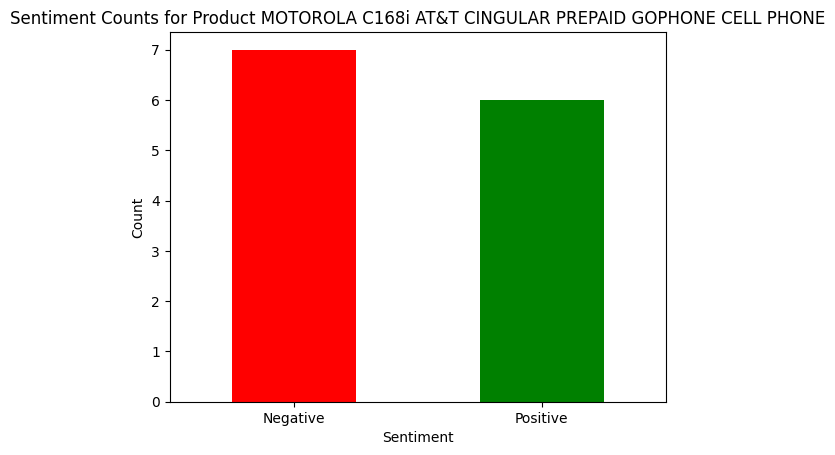

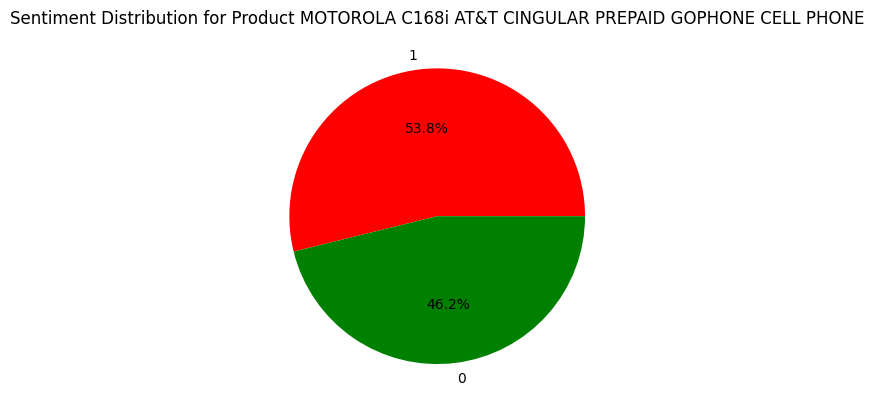

In [165]:
# Step 1: Filter for a specific product
specific_product_name = 'MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE CELL PHONE'  # Replace with the Product Name of the product you're interested in
filtered_df = balanced_df[balanced_df['product_name'] == specific_product_name]
 
# Step 2: Aggregate sentiment counts
sentiment_counts = filtered_df['sentiment'].value_counts()
 
# Step 3: Create the graphs
 
# Bar Chart
sentiment_counts.plot(kind='bar', color=['red', 'green'])
plt.title(f'Sentiment Counts for Product {specific_product_name}')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)  # Ensure labels are correctly aligned
plt.show()
 
# Pie Chart
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green'])
plt.title(f'Sentiment Distribution for Product {specific_product_name}')
plt.ylabel('')  # Hides the 'Count' label on the y-axis for clarity
plt.show()